In [ ]:
%pip install missingno

In [ ]:
%pip install ydata_profiling

In [ ]:
import missingno as msno
from ydata_profiling import ProfileReport

In [ ]:
from sklearn.preprocessing import LabelEncoder # convierte el texto a numeros
from sklearn.svm import SVC #maquina soporte vectorial
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import dump, load

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets_pandas_scikit_learn_spark-master/Bladder Cancer (MSKCC, Eur Urol 2014).csv', sep=',', header=0)
df.head()

,CNA,Concomitant Carcinoma in situ,Death due to disease,Diagnosis Age,Disease Free (Months),Disease Free Status,LN STATUS,Mutation Count,Neoadjuvant Chemotherapy,Overall Survival (Months),Overall Survival Status,Primary histology,pT STAGE,Race Category,Sample Type,Sex,SMOKING STATUS,SURGICAL TREATMENT,Tissue Sequenced,Variant Histology
0,0.000041,No,NO,68,3.16,DiseaseFree,Negative,1,No,3.16,LIVING,UCB,pT3,White,Primary,MALE,Former,Radical Cystectomy,Radical Cystectomy,Yes
1,0.544000,Yes,NO,82,0.68,Recurred/Progressed,Negative,10,No,2.11,LIVING,UCB,pT3,White,Primary,MALE,Never,Radical Cystectomy,Radical Cystectomy,No
2,0.226000,No,NO,59,1.17,Recurred/Progressed,Negative,11,Yes,1.74,LIVING,UCB,pT2,White,Primary,MALE,Active,Radical Cystectomy,Radical Cystectomy,No
3,0.222000,Yes,YES,.,0.42,Recurred/Progressed,Positive,13,No,0.56,DECEASED,UCB,pT4,White,Primary,MALE,Never,Radical Cystectomy,Radical Cystectomy,No
4,0.121000,Yes,YES,74,0.6,Recurred/Progressed,Negative,1,No,1.37,DECEASED,UCB,pT3,White,Primary,MALE,Former,Radical Cystectomy,Radical Cystectomy,Yes


In [ ]:
df.dtypes

CNA                              float64
Concomitant Carcinoma in situ     object
Death due to disease              object
Diagnosis Age                     object
Disease Free (Months)             object
Disease Free Status               object
LN STATUS                         object
Mutation Count                    object
Neoadjuvant Chemotherapy          object
Overall Survival (Months)         object
Overall Survival Status           object
Primary histology                 object
pT STAGE                          object
Race Category                     object
Sample Type                       object
Sex                               object
SMOKING STATUS                    object
SURGICAL TREATMENT                object
Tissue Sequenced                  object
Variant Histology                 object
dtype: object

In [ ]:
columnsNumerics = ['Diagnosis Age','Disease Free (Months)','Mutation Count','Overall Survival (Months)']

In [ ]:
for columna in df[columnsNumerics]:
    print(columna)
    dfp = pd.to_numeric(df[columna], errors="coerce")
    ix_pos = dfp.isna()
    print(df[ix_pos])
    print()

Diagnosis Age
      CNA Concomitant Carcinoma in situ Death due to disease Diagnosis Age  \
3   0.222                           Yes                  YES             .   
83  0.105                           Yes                  YES           NaN   

   Disease Free (Months)  Disease Free Status LN STATUS Mutation Count  \
3                   0.42  Recurred/Progressed  Positive             13   
83                  0.88  Recurred/Progressed  Positive              7   

   Neoadjuvant Chemotherapy Overall Survival (Months) Overall Survival Status  \
3                        No                      0.56                DECEASED   
83                       No                      1.47                DECEASED   

   Primary histology pT STAGE Race Category Sample Type   Sex SMOKING STATUS  \
3                UCB      pT4         White     Primary  MALE          Never   
83               UCB      pT3         White     Primary  MALE         Active   

    SURGICAL TREATMENT    Tissue Sequenced 

In [ ]:
hp = {"Diagnosis Age": {"NaN":0,".":0}}
df = df.replace(hp)
df["Diagnosis Age"] = pd.to_numeric(df["Diagnosis Age"])

hp = {"Disease Free (Months)": {"NaN":0,"*":0}}
df = df.replace(hp)
df["Disease Free (Months)"] = pd.to_numeric(df["Disease Free (Months)"])

hp = {"Mutation Count": {"*":0}}
df = df.replace(hp)
df["Mutation Count"] = pd.to_numeric(df["Mutation Count"])

hp = {"Overall Survival (Months)": {"NaN":0,"*":0}}
df = df.replace(hp)
df["Overall Survival (Months)"] = pd.to_numeric(df["Overall Survival (Months)"])

hp = {"Concomitant Carcinoma in situ": {"*":None}}
df = df.replace(hp)

hp = {"Disease Free Status": {"*":None,".":None}}
df = df.replace(hp)

hp = {"Tissue Sequenced": {".":None}}
df = df.replace(hp)


hp = {"Overall Survival Status": {"?":None}}
df = df.replace(hp)

In [ ]:
df.dtypes

CNA                              float64
Concomitant Carcinoma in situ     object
Death due to disease              object
Diagnosis Age                    float64
Disease Free (Months)            float64
Disease Free Status               object
LN STATUS                         object
Mutation Count                     int64
Neoadjuvant Chemotherapy          object
Overall Survival (Months)        float64
Overall Survival Status           object
Primary histology                 object
pT STAGE                          object
Race Category                     object
Sample Type                       object
Sex                               object
SMOKING STATUS                    object
SURGICAL TREATMENT                object
Tissue Sequenced                  object
Variant Histology                 object
dtype: object

<Axes: >

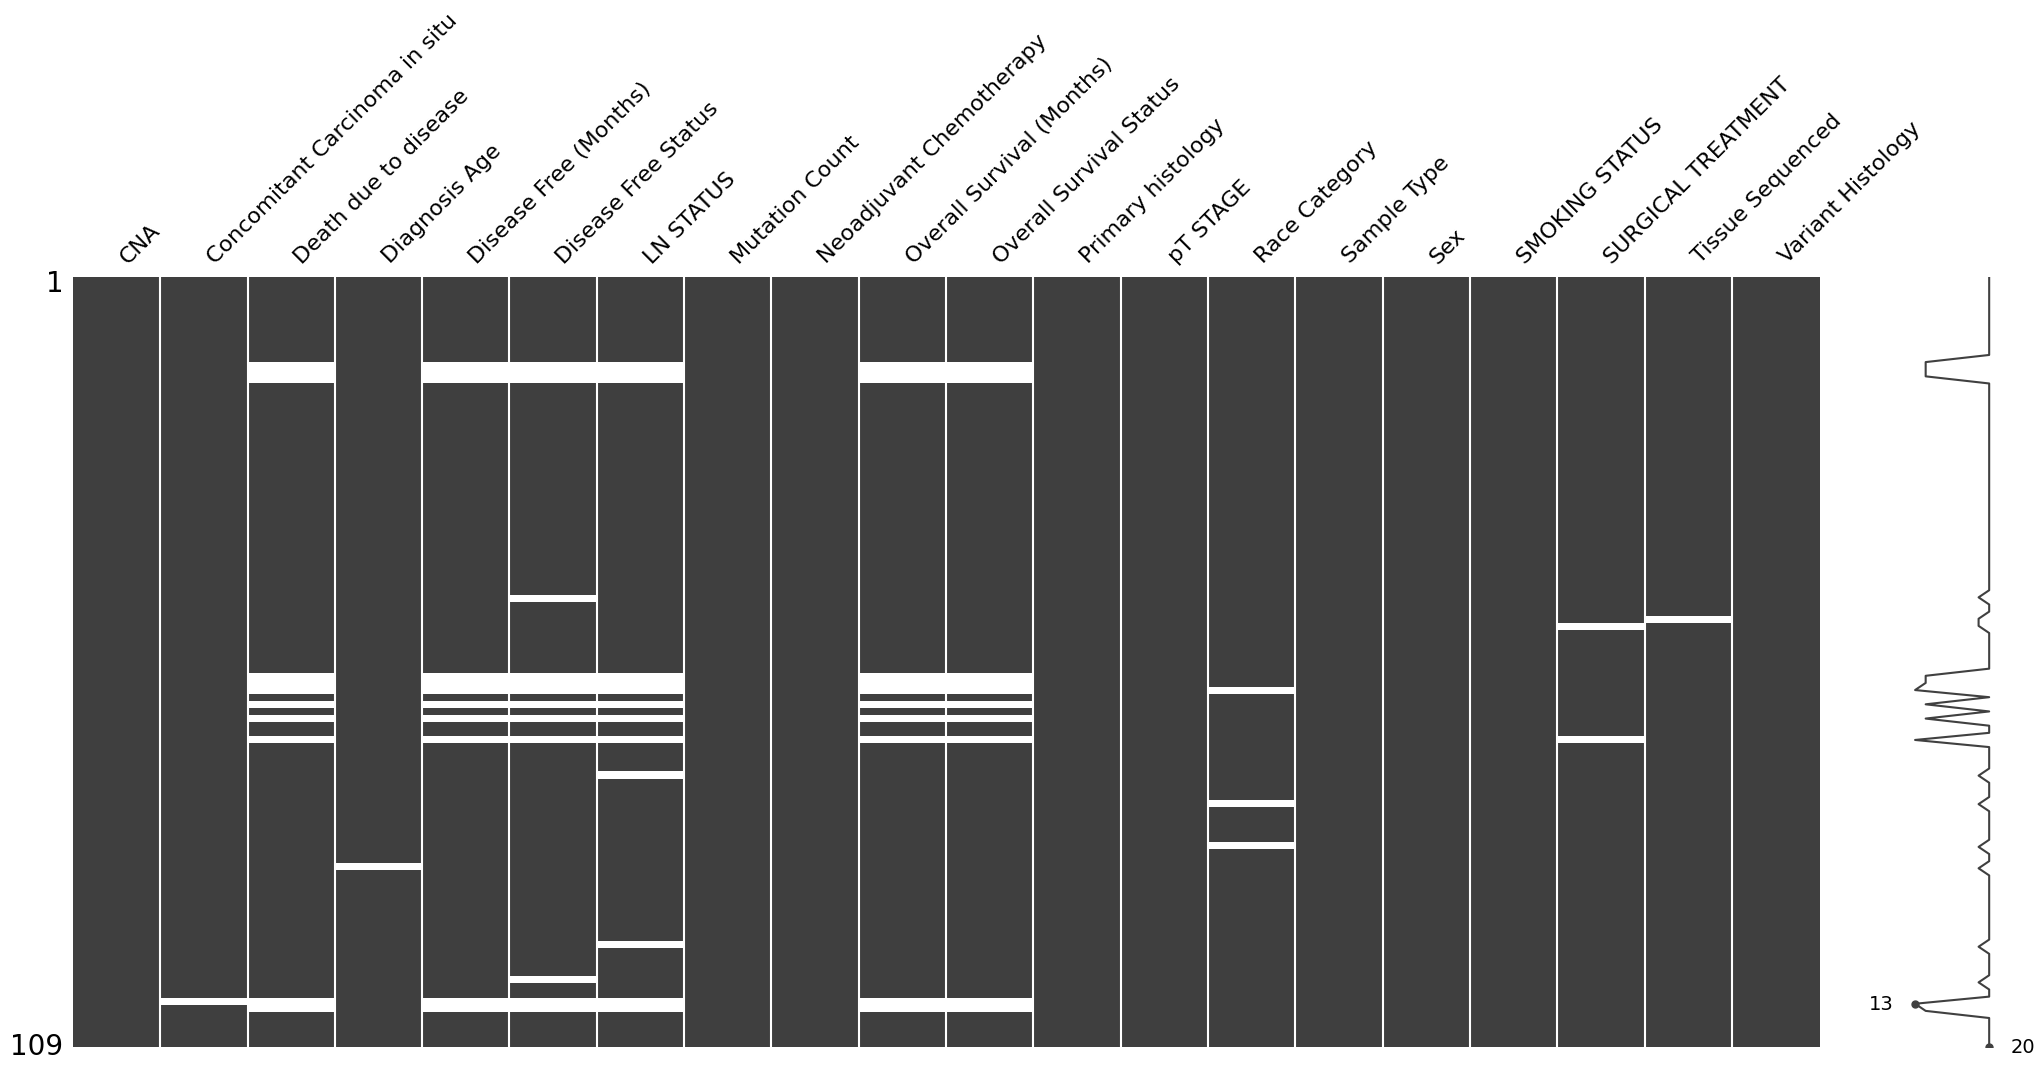

In [ ]:
msno.matrix(df)

<Axes: >

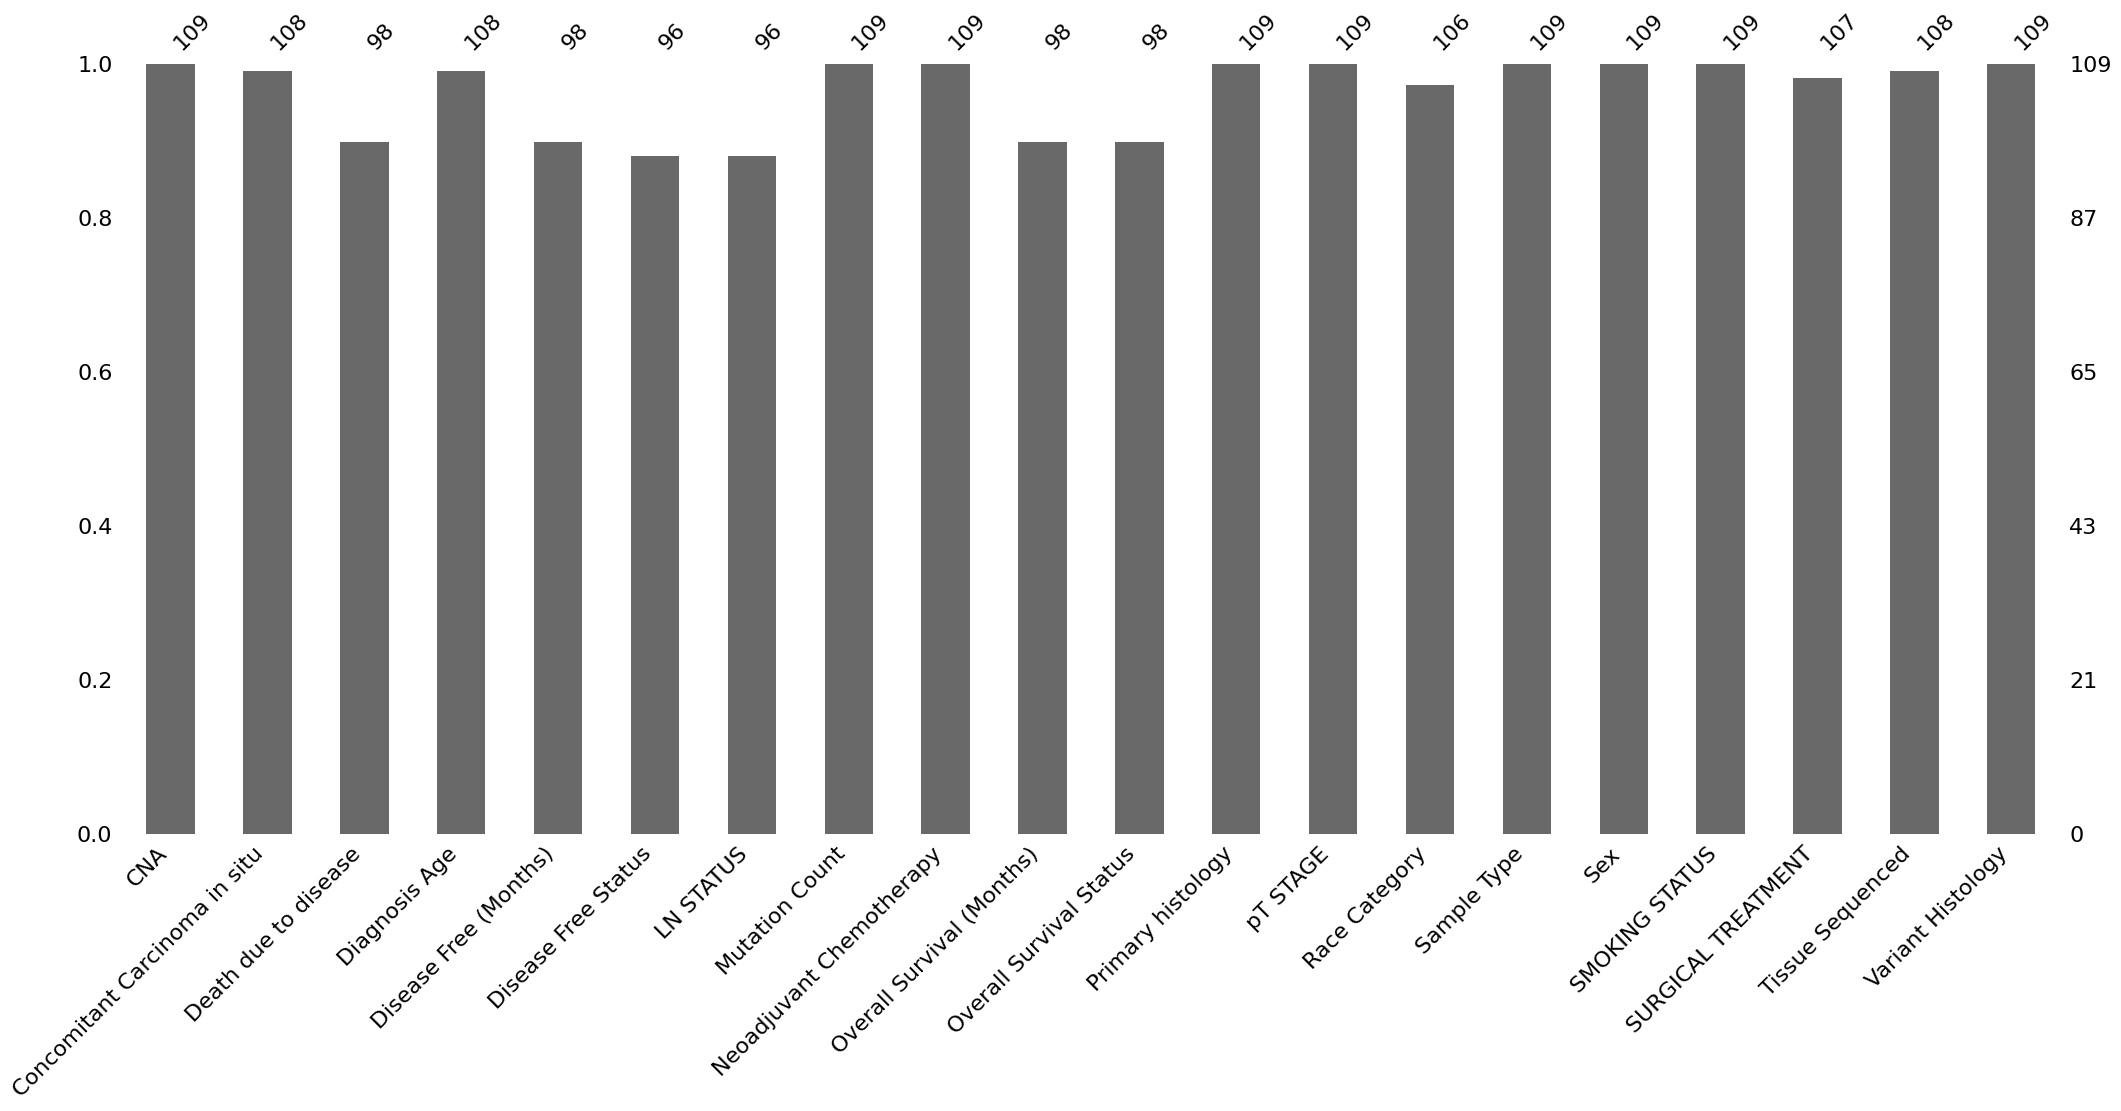

In [ ]:
msno.bar(df)

In [ ]:
profile = ProfileReport(df, title='Profiling Report')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.isnull().sum()
# 109 observaciones = 100 %
# 78 nulos  = $71.55%
# es mucho, asi que no lo podemos eliminar

CNA                               0
Concomitant Carcinoma in situ     1
Death due to disease             11
Diagnosis Age                     1
Disease Free (Months)            11
Disease Free Status              13
LN STATUS                        13
Mutation Count                    0
Neoadjuvant Chemotherapy          0
Overall Survival (Months)        11
Overall Survival Status          12
Primary histology                 0
pT STAGE                          0
Race Category                     3
Sample Type                       0
Sex                               0
SMOKING STATUS                    0
SURGICAL TREATMENT                2
Tissue Sequenced                  1
Variant Histology                 0
dtype: int64

In [ ]:
df['Concomitant Carcinoma in situ'].fillna(df['Concomitant Carcinoma in situ'].mode().iloc[0], inplace=True)
df['Death due to disease'].fillna(df['Death due to disease'].mode().iloc[0], inplace=True)
df['Diagnosis Age'].fillna(df['Diagnosis Age'].median(), inplace=True)
df['Disease Free (Months)'].fillna(df['Disease Free (Months)'].median(), inplace=True)
df['Disease Free Status'].fillna(df['Disease Free Status'].mode().iloc[0], inplace=True)
df['LN STATUS'].fillna(df['LN STATUS'].mode().iloc[0], inplace=True)
df['Overall Survival (Months)'].fillna(df['Overall Survival (Months)'].median(), inplace=True)
df['Overall Survival Status'].fillna(df['Overall Survival Status'].mode().iloc[0], inplace=True)
df['Race Category'].fillna(df['Race Category'].mode().iloc[0], inplace=True)
df['SURGICAL TREATMENT'].fillna(df['SURGICAL TREATMENT'].mode().iloc[0], inplace=True)
df['Tissue Sequenced'].fillna(df['Tissue Sequenced'].mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

CNA                              0
Concomitant Carcinoma in situ    0
Death due to disease             0
Diagnosis Age                    0
Disease Free (Months)            0
Disease Free Status              0
LN STATUS                        0
Mutation Count                   0
Neoadjuvant Chemotherapy         0
Overall Survival (Months)        0
Overall Survival Status          0
Primary histology                0
pT STAGE                         0
Race Category                    0
Sample Type                      0
Sex                              0
SMOKING STATUS                   0
SURGICAL TREATMENT               0
Tissue Sequenced                 0
Variant Histology                0
dtype: int64

In [ ]:
le41 = LabelEncoder()
le42 = LabelEncoder()
le43 = LabelEncoder()
le44 = LabelEncoder()
le45 = LabelEncoder()
le46 = LabelEncoder()
le47 = LabelEncoder()
le48 = LabelEncoder()
le49 = LabelEncoder()
le410 = LabelEncoder()
le411 = LabelEncoder()
le412 = LabelEncoder()
le413 = LabelEncoder()
le414 = LabelEncoder()
le415 = LabelEncoder()
df['ccis'] = le41.fit_transform(df['Concomitant Carcinoma in situ'])
df['ddtd'] = le42.fit_transform(df['Death due to disease'])
df['dfs'] = le43.fit_transform(df['Disease Free Status'])
df['lnstatus'] = le44.fit_transform(df['LN STATUS'])
df['neoadjuvant'] = le45.fit_transform(df['Neoadjuvant Chemotherapy'])
df['osurvival_status'] = le46.fit_transform(df['Overall Survival Status'])
df['p_histology'] = le47.fit_transform(df['Primary histology'])
df['pt_stage'] = le48.fit_transform(df['pT STAGE'])
df['race_category'] = le49.fit_transform(df['Race Category'])
df['sample_type'] = le410.fit_transform(df['Sample Type'])
df['sexo'] = le411.fit_transform(df['Sex'])
df['smoking_status'] = le412.fit_transform(df['SMOKING STATUS'])
df['surgical_treatment'] = le413.fit_transform(df['SURGICAL TREATMENT'])
df['tissue_sequenced'] = le414.fit_transform(df['Tissue Sequenced'])
df['variant_histology'] = le415.fit_transform(df['Variant Histology'])
dump(le41, 'le4_01.joblib')
dump(le42, 'le4_02.joblib')
dump(le43, 'le4_03.joblib')
dump(le44, 'le4_04.joblib')
dump(le45, 'le4_05.joblib')
dump(le46, 'le4_06_oss.joblib')
dump(le47, 'le4_07.joblib')
dump(le48, 'le4_08.joblib')
dump(le49, 'le4_09.joblib')
dump(le410, 'le4_10.joblib')
dump(le411, 'le4_11.joblib')
dump(le412, 'le4_12.joblib')
dump(le413, 'le4_13.joblib')
dump(le414, 'le4_14.joblib')
dump(le415, 'le4_15.joblib')

['le4_15.joblib']

In [ ]:
df.head()

,CNA,Concomitant Carcinoma in situ,Death due to disease,Diagnosis Age,Disease Free (Months),Disease Free Status,LN STATUS,Mutation Count,Neoadjuvant Chemotherapy,Overall Survival (Months),...,osurvival_status,p_histology,pt_stage,race_category,sample_type,sexo,smoking_status,surgical_treatment,tissue_sequenced,variant_histology
0,0.000041,No,NO,68.0,3.16,DiseaseFree,Negative,1,No,3.16,...,1,0,5,1,0,2,1,0,1,1
1,0.544000,Yes,NO,82.0,0.68,Recurred/Progressed,Negative,10,No,2.11,...,1,0,5,1,0,2,2,0,1,0
2,0.226000,No,NO,59.0,1.17,Recurred/Progressed,Negative,11,Yes,1.74,...,1,0,4,1,0,2,0,0,1,0
3,0.222000,Yes,YES,0.0,0.42,Recurred/Progressed,Positive,13,No,0.56,...,0,0,6,1,0,2,2,0,1,0
4,0.121000,Yes,YES,74.0,0.60,Recurred/Progressed,Negative,1,No,1.37,...,0,0,5,1,0,2,1,0,1,1


<ipython-input-11-fdf8fa3ad365>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


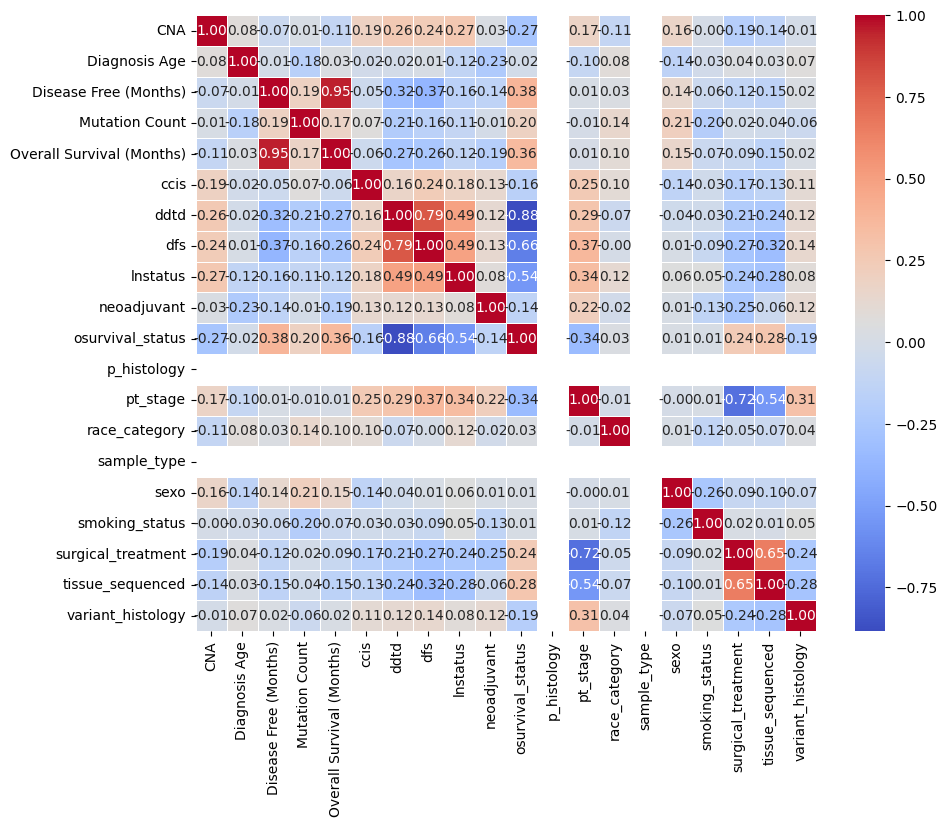

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [ ]:
umbral = 0.3
high_corr_features = (corr_matrix.abs() > umbral).sum()
high_corr_features = high_corr_features[high_corr_features > 1].index.tolist()

# Muestra las características con mayor correlación
print("Características con mayor correlación:")
print(high_corr_features)

Características con mayor correlación:
['Disease Free (Months)', 'Overall Survival (Months)', 'ddtd', 'dfs', 'lnstatus', 'osurvival_status', 'pt_stage', 'surgical_treatment', 'tissue_sequenced', 'variant_histology']


In [ ]:
features = ['Disease Free (Months)', 'Overall Survival (Months)', 'ddtd', 'dfs', 'lnstatus', 'pt_stage', 'surgical_treatment', 'tissue_sequenced', 'variant_histology']
label = 'Overall Survival Status' # osurvival_status

In [ ]:
df[label].value_counts()

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features], df.osurvival_status, test_size=0.20, random_state=0, stratify=df.osurvival_status)

class_weights = len(ytrain) / (len(np.unique(ytrain)) * np.bincount(ytrain))
sample_weights = class_weights[ytrain]

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(len(ytrain))
print(len(ytest))

(87, 9)
(22, 9)
87
22


In [ ]:
ytrain.value_counts()

1    55
0    32
Name: osurvival_status, dtype: int64

# SVC Maquina de soporte vectorial

In [ ]:
svm = SVC(probability=True, class_weight='balanced')
modelo = svm.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
prediccion
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

score:  0.9090909090909091
recall_score:  0.9090909090909091
accuracy_score:  0.9090909090909091
f1_score:  0.9090909090909091

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12

    accuracy                           0.91        22
   macro avg       0.93      0.90      0.91        22
weighted avg       0.92      0.91      0.91        22



<Axes: >

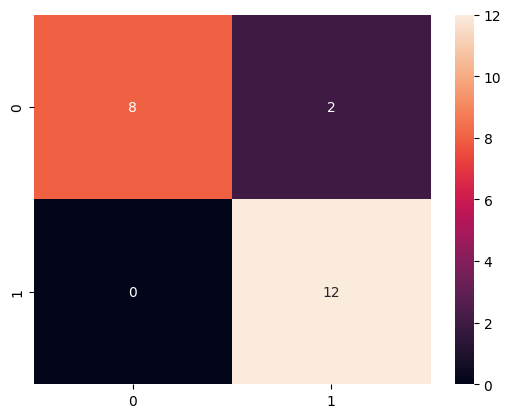

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

In [ ]:
data = {'Age At Procurement':70.5,	'Mutation Count':201.2,	'ms':8,	'pg':0, 'pts':2, 'st':1, 'ss':9, 'tss':0}

p = pd.DataFrame(data, index=[0])
npm = modelo.predict(p)
le4_06_oss.inverse_transform(npm.tolist())
# datadrif si alucina

array(['sun-exposed'], dtype=object)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=100, class_weight='balanced')
modelo.fit(xtrain, ytrain) #sample_weight=sample_weights
prediccion = modelo.predict(xtest)

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

score:  0.9545454545454546
recall_score:  0.9545454545454546
accuracy_score:  0.9545454545454546
f1_score:  0.9545454545454546

classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.96        13

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



<Axes: >

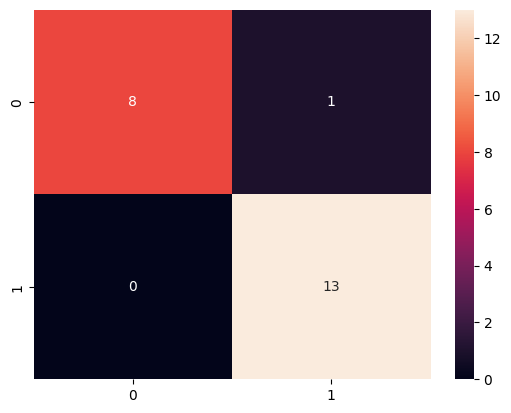

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print()
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

## Arboles de decicion

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import pydotplus

In [ ]:
dtc = DecisionTreeClassifier(max_depth=6, class_weight='balanced')
modelo = dtc.fit(xtrain, ytrain) # sample_weight=sample_weights
prediccion = modelo.predict(xtest)

In [ ]:
# ytest = prediccion
prediccion_list = prediccion.tolist()
ytest_lista = ytest.tolist()
i = 0
for p in prediccion_list:
  print(p, ytest_lista[i])
  i += 1

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

score:  0.9090909090909091
recall_score:  0.9090909090909091
accuracy_score:  0.9090909090909091
f1_score:  0.9090909090909091
classification_report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.93      0.93      0.93        14

    accuracy                           0.91        22
   macro avg       0.90      0.90      0.90        22
weighted avg       0.91      0.91      0.91        22



<Axes: >

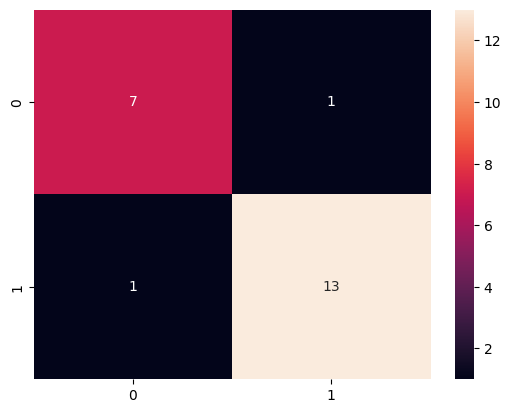

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

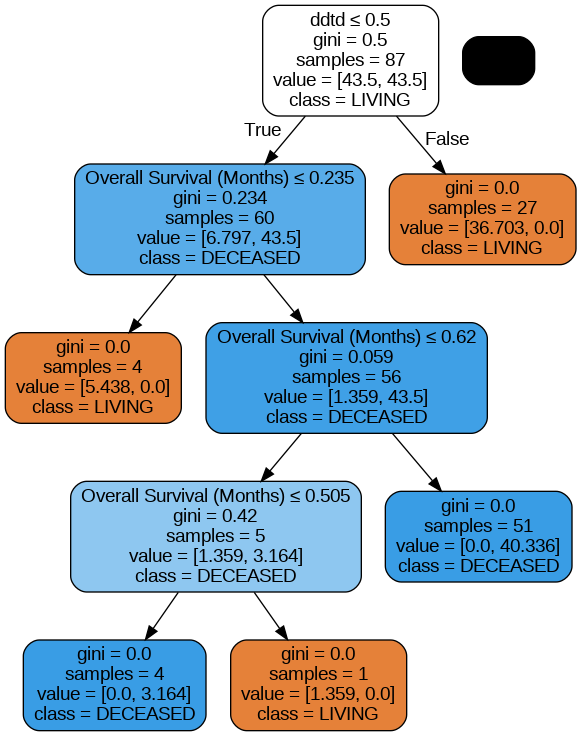

In [ ]:
dot_data = export_graphviz(modelo, out_file=None, feature_names=features, class_names=df[label].unique(), filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
modelo = gbc.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)
dump(modelo,'modelo4.joblib')

['modelo4.joblib']

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

score:  0.9545454545454546
recall_score:  0.9545454545454546
accuracy_score:  0.9545454545454546
f1_score:  0.9545454545454546
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      1.00      0.96        13

    accuracy                           0.95        22
   macro avg       0.96      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



<Axes: >

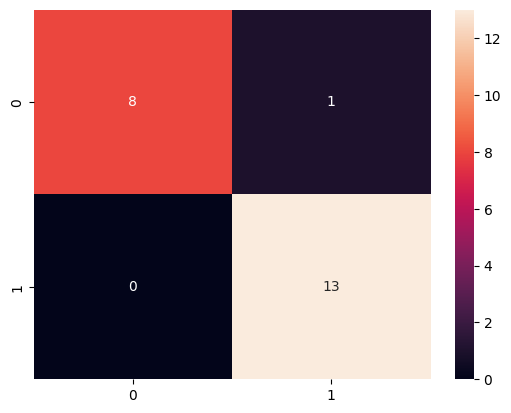

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(xtrain, ytrain, sample_weight=sample_weights)
prediccion = modelo.predict(xtest)

['modelo3.joblib']

LIVING      69
DECEASED    40
Name: Overall Survival Status, dtype: int64

score:  0.9090909090909091
recall_score:  0.9090909090909091
accuracy_score:  0.9090909090909091
f1_score:  0.9090909090909091
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.86      1.00      0.92        12

    accuracy                           0.91        22
   macro avg       0.93      0.90      0.91        22
weighted avg       0.92      0.91      0.91        22



<Axes: >

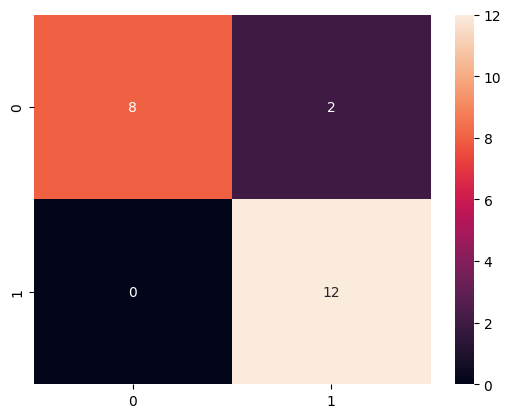

In [ ]:
print(df[label].value_counts())
print()
print('score: ',modelo.score(xtest, ytest))

print('recall_score: ',recall_score(prediccion,ytest, average='micro'))
print('accuracy_score: ',accuracy_score(prediccion,ytest))
print('f1_score: ',f1_score(prediccion,ytest, average='micro'))
print('classification_report: ',classification_report(prediccion,ytest), sep='\n')
# si esta desbalancead recall
cf = confusion_matrix(prediccion,ytest)
sns.heatmap(cf, annot=True)

|    recall    |   SVC     | randomForest | DecisionTree |GradientBoosting|naive bayes|
|--------------|-----------|--------------|--------------|----------------|-----------|
|       0      |   0.80    |     0.89     |    0.88      |     0.94       |   0.89         |   
|       1      |   1.00    |     1.00     |    0.93      |     0.96       |   0.92         |
|   accuracy   |   0.91    |     0.95     |    0.91      |     0.95       |   0.91         |


Los mejores clasificadores fue random forest y Gradient Boosting, le sigue naive bayes, SVC y Decision Tree Classifier, y aunque random forest tiene el mismo accuracy que Gradient Boosting pero elegi guardar el modelo de Gradient Boosting porque esta mas balanceado es sus salidas